<a href="https://colab.research.google.com/github/SalgadoHUB/Classical_Mechanics_II/blob/main/Notebooks/fuente_fotones_subPoisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de una fuente de fotones con estadística sub-Poissoniana

En este notebook se simula la emisión de fotones proveniente de una fuente con **estadística sub-Poissoniana**.

En este tipo de fuente se cumple:

$$
\mathrm{Var}(n) < \langle n \rangle
$$

lo que implica **fluctuaciones más pequeñas** que las de una fuente coherente (Poissoniana).
Este comportamiento se asocia a:

- Fuentes de **un solo fotón** reales
- **Luz comprimida (squeezed light)**
- Sistemas cuánticos que suprimen la coincidencia de fotones (antibunching)

---

## Distribuciones relevantes

| Tipo de fuente | Distribución | Relación Var/⟨n⟩ |
|----------------|---------------|------------------|
| Térmica        | Binomial negativa | > 1 |
| Coherente      | Poisson | = 1 |
| Sub-Poissoniana | Binomial (o similar) | < 1 |

---

### Modelo usado

Para simular una fuente sub-Poissoniana utilizaremos una **distribución binomial**:

$$
P(n) = \binom{N}{n} p^n (1 - p)^{N - n}
$$

con:
$$
\langle n \rangle = Np, \quad \mathrm{Var}(n) = Np(1-p)
$$

Si \(p < 1\), entonces $\mathrm{Var}(n) < \langle n \rangle$.

Esto nos permite controlar el grado de sub-Poissonianidad variando $p$ y $N$.

## Configuración de la simulación

Parámetros principales:

- `n_promedio`: número medio de fotones por intervalo
- `N`: número máximo posible de fotones (parámetro de la binomial)
- `p`: probabilidad de emisión por ensayo (ajustado para obtener la media deseada)
- `num_intervalos`: número de intervalos temporales simulados


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros deseados
n_promedio = 3.0   # media deseada
N = 10             # número máximo posible de fotones (define el "tope")
num_intervalos = 1000    # número de intervalos simulados
duracion_total = 10.0  # duración total en segundos

# Calcular la probabilidad p para que la media sea n_promedio
p = n_promedio / N

# Generar conteos de fotones (distribución binomial)
conteos = np.random.binomial(N, p, size=num_intervalos)
tiempo = np.linspace(0, duracion_total, num_intervalos)

# Calcular estadísticas
media = conteos.mean()
varianza = conteos.var(ddof=0)
fano = varianza / media

print("Resultados de la simulación:")
print(f"⟨n⟩ teórico = {n_promedio}")
print(f"N = {N}")
print(f"p = {p:.4f}")
print(f"Media empírica = {media:.4f}")
print(f"Varianza = {varianza:.4f}")
print(f"Factor de Fano = {fano:.4f}")

Resultados de la simulación:
⟨n⟩ teórico = 3.0
N = 10
p = 0.3000
Media empírica = 2.9670
Varianza = 2.0999
Factor de Fano = 0.7078


## Serie temporal de la emisión de fotones

A continuación se muestra el número de fotones emitidos en cada intervalo de tiempo.

En este caso las fluctuaciones son menores que en la estadística de Poisson,
y el factor de Fano $F < 1$.

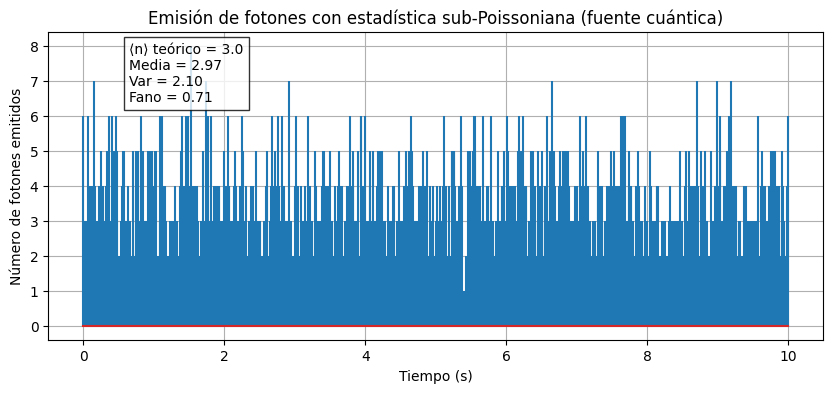

In [6]:
plt.figure(figsize=(10, 4))
#plt.plot(tiempo, conteos, drawstyle='steps-mid', color='tab:green')
plt.stem(tiempo, conteos, markerfmt='None')
plt.xlabel("Tiempo (s)")
plt.ylabel("Número de fotones emitidos")
plt.title("Emisión de fotones con estadística sub-Poissoniana (fuente cuántica)")

texto = (
    f"⟨n⟩ teórico = {n_promedio}\n"
    f"Media = {media:.2f}\n"
    f"Var = {varianza:.2f}\n"
    f"Fano = {fano:.2f}"
)
plt.text(0.65, 0.8 * max(conteos), texto,
         bbox=dict(facecolor='white', alpha=0.8))
plt.grid(True)
plt.show()

## Histograma de la distribución de fotones

La distribución de probabilidad sigue la forma de una **distribución binomial**,
con menor dispersión que la distribución de Poisson con la misma media.

Text(0.6, 0.95, 'Promedio (⟨n⟩): 2.97\nVarianza: 2.10\nDuración: 10.0 s')

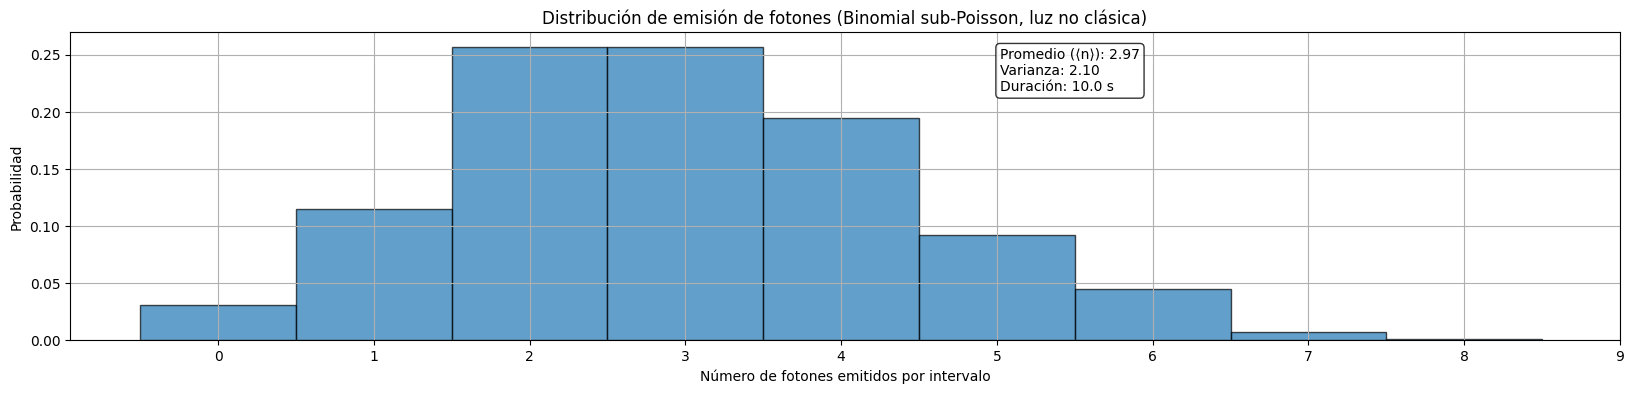

In [8]:
fig, ax = plt.subplots(figsize=(20, 4))
histograma = ax.hist(conteos, bins=range(0, max(conteos)+2), align="left", density=True, alpha=0.7, edgecolor='black')
ax.set_xticks(histograma[1])
ax.set_title("Distribución de emisión de fotones (Binomial sub-Poisson, luz no clásica)")
ax.set_xlabel("Número de fotones emitidos por intervalo")
ax.set_ylabel("Probabilidad")
ax.grid(True)

# Caja de texto con estadísticas
texto = (
    f"Promedio (⟨n⟩): {media:.2f}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Duración: {duracion_total} s"
)
ax.text(0.60, 0.95, texto, verticalalignment='top', transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'),
         fontsize=10)


## Conclusión

- La **distribución binomial** permite simular una fuente **sub-Poissoniana**:
  $$
  \mathrm{Var}(n) = \langle n \rangle (1 - p) < \langle n \rangle
  $$
- El **factor de Fano** $F = 1 - p < 1$.
- El resultado es una **fuente cuántica no clásica**, donde las fluctuaciones
  son reducidas respecto a la media.
- Para valores más pequeños de `p` (o equivalentes valores mayores de `N`),
  la distribución se aproxima a la de Poisson.